## Exercise 2: Globe tossing experiment, reloaded

The experiment is carried out a second time, with 13 ”water” out of 24 tosses.

The goal is again to find out the percentage of the globe that is covered in water. Lets first calculate as done in the lecture.

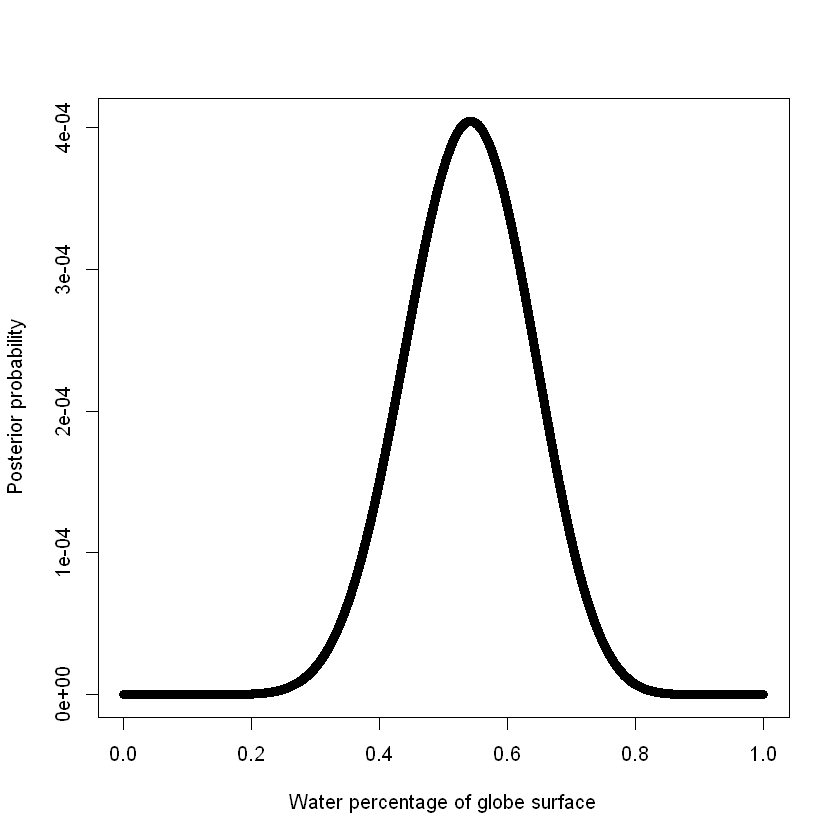

In [1]:
# The known values
tosses <- 24
water <- 13

# We then proceed as done in the lecture
array_size <- 10000
grid <- seq(from=0, to=1, length.out=array_size)

# We define the prior to be a uniform probability distribution
prior1 <- rep(1, array_size)

# The likelihood is given by the binomial probability distribution
likelihood <- dbinom(water, size=tosses, prob=grid)

norm <- sum(likelihood * prior1)
posterior1 <- likelihood * prior1 / norm

plot(grid, posterior1, type="b", xlab="Water percentage of globe surface", ylab="Posterior probability")

1. Try a different prior than the uniform one used in the course and motivate its choice.

Lets say we know that there is more than 50 percent water on the globe. Thus we may use a prior that reflects this.

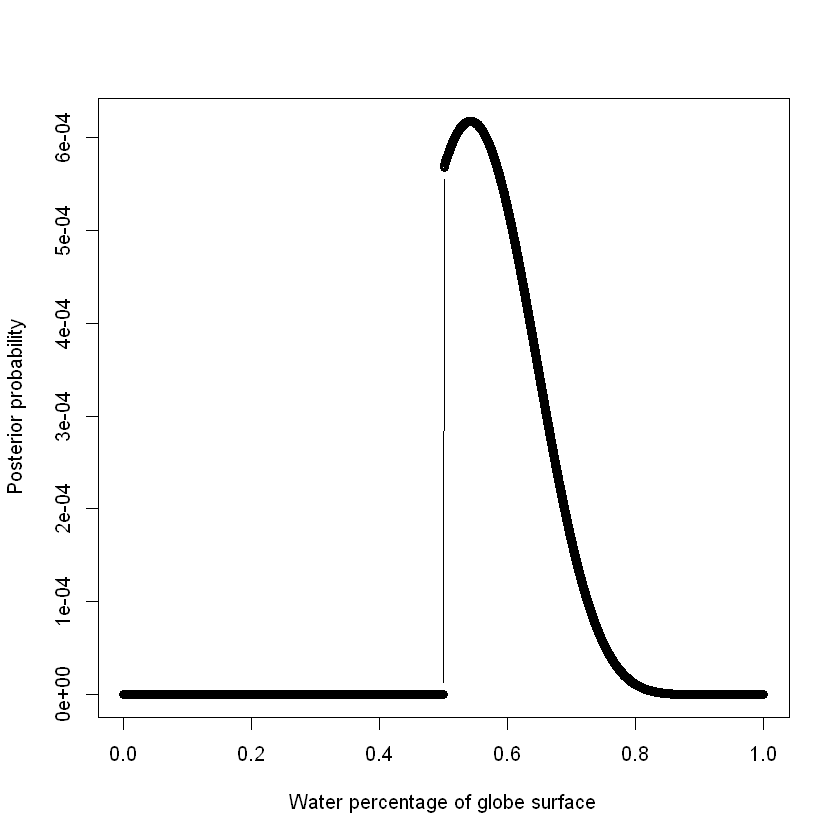

In [2]:
# First we partition the array into a lower and upper section
lower_bound <- 0.5

lower_cut <- floor(array_size * lower_bound)
uppter_cut <- array_size - lower_cut

# Then we use a step function
lower <- rep(0, lower_cut)
upper <- rep(1, uppter_cut)

prior2 <- append(lower, upper)

norm <- sum(likelihood * prior2)
posterior2 <- likelihood * prior2 / norm

plot(grid, posterior2, type="b", xlab="Water percentage of globe surface", ylab="Posterior probability")

2. Compute the posterior distribution using grid approximation.

All computations above were done using grid approximation.

3.  Draw 10’000 samples from the posterior distribution and compute the 85% credible interval and 90% HPDI for the water fraction on the globe.

Again we proceed as done in the lecture.

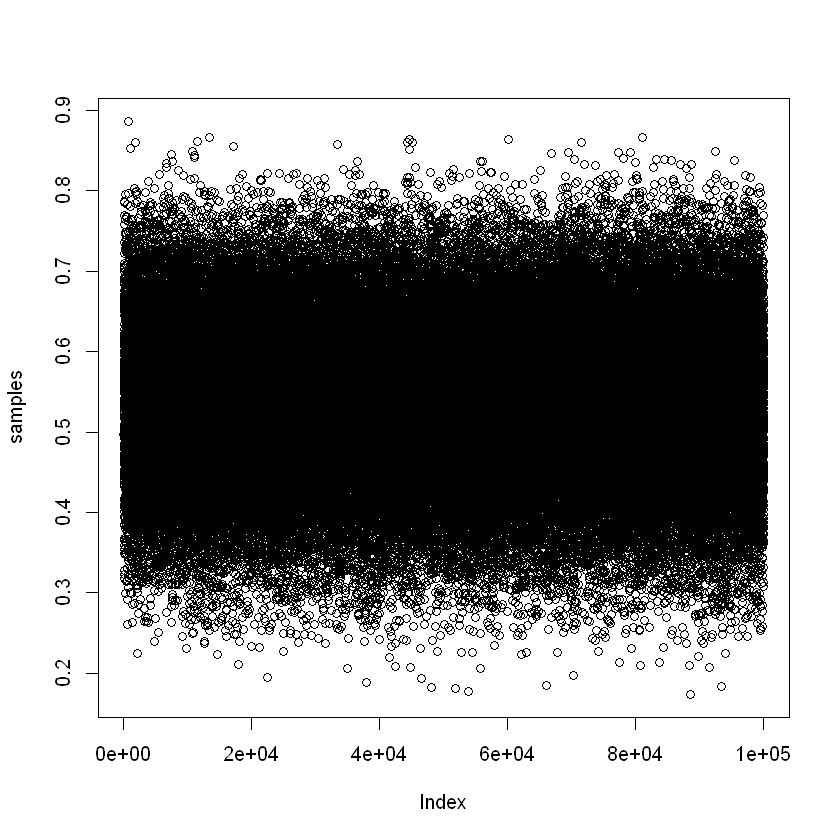

In [3]:
samples_amount <- array_size * 10
samples <- sample(grid, samples_amount, replace = TRUE, prob = posterior1)

plot(samples)

Now we make use of the rethinking library.

Lade nötiges Paket: rstan

Lade nötiges Paket: StanHeaders


rstan version 2.26.16 (Stan version 2.26.1)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


Do not specify '-march=native' in 'LOCAL_CPPFLAGS' or a Makevars file

Lade nötiges Paket: cmdstanr

This is cmdstanr version 0.5.3

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: D:/Users/Immanuel/Documents/.cmdstan/cmdstan-2.31.0

- CmdStan version: 2.31.0

Lade nötiges Paket: parallel

rethinking (Version 2.31)


Attache Paket: 'rethinking'


Das folgende Objekt ist maskiert 'package:rstan':

    stan


Das folgende Objekt ist maskiert 'package:stats':

    rstudent




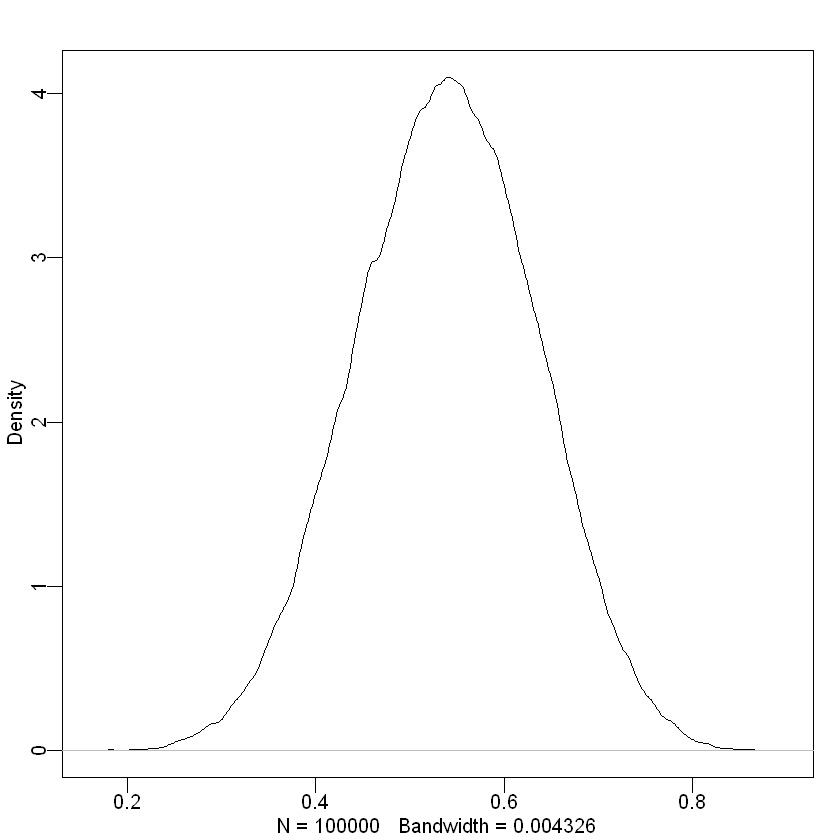

In [4]:
library(rethinking)
dens (samples)

In [5]:
quantile(samples, 0.85)
quantile(samples, 0.15)

85% 
0.6393639

15% 
0.4368437

We thus conclude that the globe has 64 percent water or less with a probability of 85 percent. Equally we can conclude that there is a 85 percent probability that the globe has 43 water or more.

In [6]:
HPDI(samples, 0.9)

|0.9      0.9| 
0.3787379 0.6944694

And here we see that the *highest posterior density interval* (HPDI) is [0.38, 0.69].

In [7]:
grid[which.max(posterior1)]

[1] 0.5416542

The highest posterior probability (MAP) is found to be at 54 percent.

4. Using the posterior distribution function, compute the probability of observing 6 ”water” out of 9 tosses? How does it compare to the 13 ”water” out of 24 tosses in this exercise?

We find the probability of drawing 6 out of 9 by multiplying the posterior with the binomial probability distribution of the desired draws.

In [8]:
observable_density <- dbinom(6, size=9, prob=grid)

observable <- sum(observable_density * posterior1)

observable

[1] 0.18829

We find a 19 percent probability to draw 6 water out of 9 tosses. Next we do the same for 13 out of 24.

In [9]:
observable_density <- dbinom(13, size=24, prob=grid)

observable <- sum(observable_density * posterior1)

observable

[1] 0.1160807

We observe a 11 percent probability to get 13 out of 24. If we compare the water draw percentage of the two probabilities, 66 and 54, we can reason that even though the second probability is on the *maximum a posteriori*, the fact that the space of possible combinations went from 10 to 25 impacted the chance that this particular combination gets drawn enough to make its probability lower than the one further away from the maximum. We can see this if we take the combination of 5 water of 9 tosses. There the water draw percentage remains quite similar (55 percent), yet because we now compare the same amount of draws, this comparison is actually significant.

In [10]:
observable_density <- dbinom(5, size=9, prob=grid)

observable <- sum(observable_density * posterior1)

observable

[1] 0.222975

5. Repeat this exercise using a biased, over-constrained prior (e.g. Normal distribution with mean 0.3 and standard deviation 0.05). How does that affect your results? Increase the standard deviation to 0.5 and comment your findings.

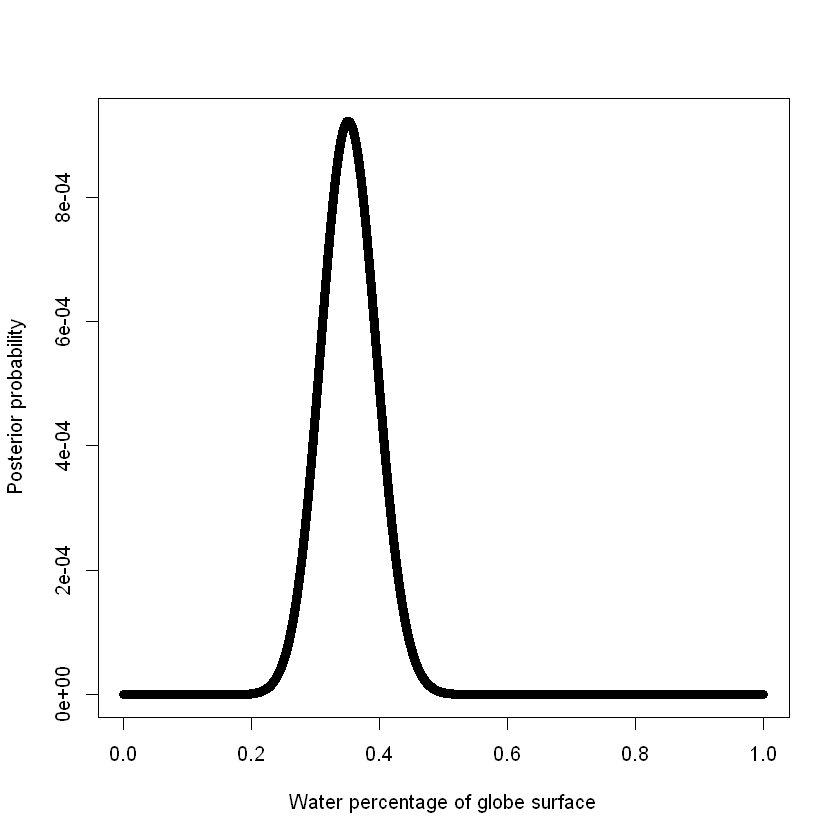

In [11]:
prior3 <- dnorm(grid, 0.3, 0.05)

# The likelihood is given by the binomial probability distribution
likelihood <- dbinom(water, size=tosses, prob=grid)

norm <- sum(likelihood * prior3)
posterior3 <- likelihood * prior3 / norm

plot(grid, posterior3, type="b", xlab="Water percentage of globe surface", ylab="Posterior probability")

First we remark that the peak of the probability distribution has shifted notably to the left. Next we want to consider the 85 percent quantile and the HPDI at 90 percent.

In [12]:
samples <- sample(grid, samples_amount, replace = TRUE, prob = posterior3)

quantile(samples, 0.85)
quantile(samples, 0.15)
HPDI(samples, 0.9)

85% 
0.3963396

15% 
0.3068307

|0.9      0.9| 
0.2798280 0.4216422

When we compare the results, we see our observations reaffirmed, as all values have been lowered. Finally we want to look at the probability to draw 6 water out of 9 tosses.

In [13]:
observable_density <- dbinom(6, size=9, prob=grid)

observable <- sum(observable_density * posterior3)

observable

[1] 0.04697785

The probability has been reduced dramatically, as expected by the general shift of to the left. Doing the same comparisons for a standard deviation of 0.5 below, we can see that generally, picking a prior that exhibits strong bias strongly reduces the possibility to get a deviating result. And with a in this case clearly wrong bias we require enormous a lot of data (tosses) to get to a correct result.

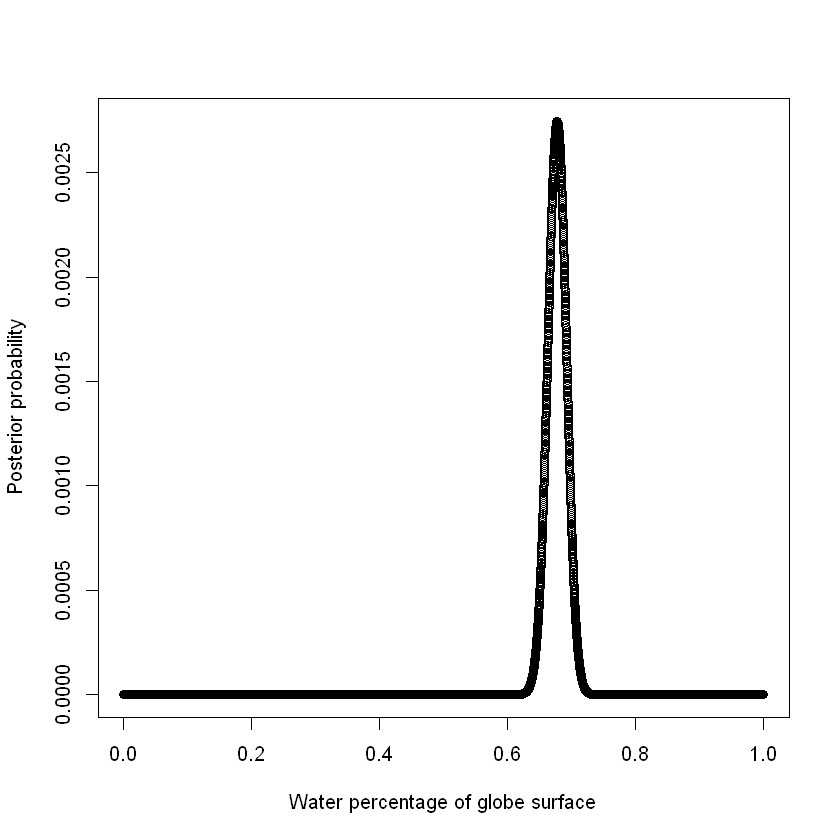

In [14]:
prior3 <- dnorm(grid, 0.3, 0.05)

big_amount_of_draws <- 1000
seemingly_correct_amount_of_water <- floor(0.71 * big_amount_of_draws)

# The likelihood is given by the binomial probability distribution
likelihood <- dbinom(seemingly_correct_amount_of_water, size = big_amount_of_draws, prob = grid)

norm <- sum(likelihood * prior3)
posterior3 <- likelihood * prior3 / norm

plot(grid, posterior3, type="b", xlab="Water percentage of globe surface", ylab="Posterior probability")

Here we do the same caluclations again for standard deviation 0.5. The discussion has been done above.

85% 
0.5545555

15% 
0.4614461

|0.9      0.9| 
0.4346435 0.5821582

[1] 0.1713352

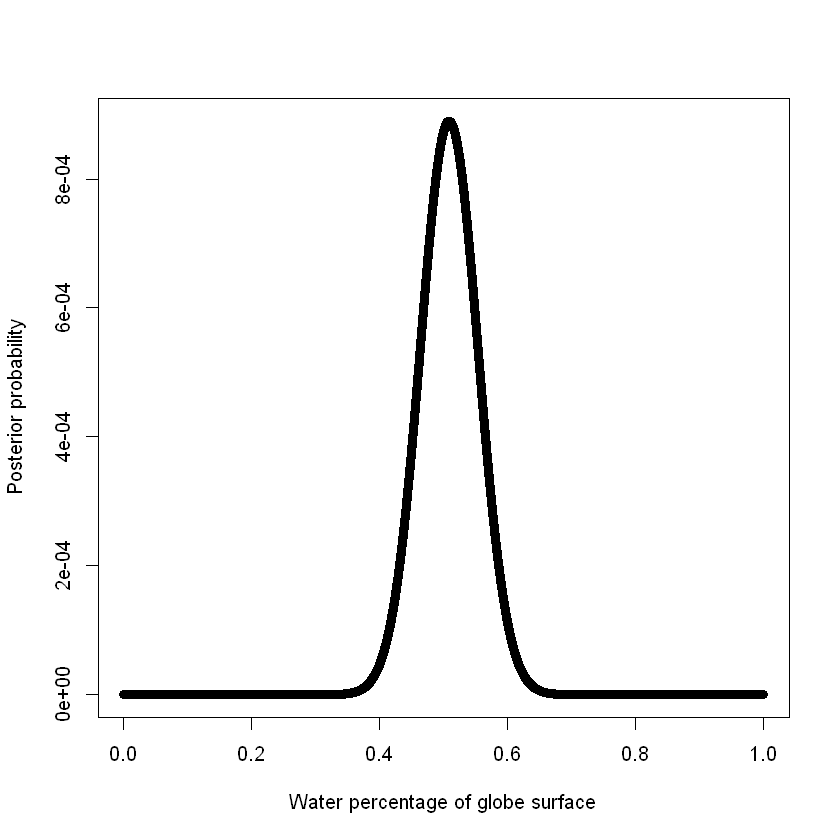

In [15]:
prior4 <- dnorm(grid, 0.5, 0.05)

# The likelihood is given by the binomial probability distribution
likelihood <- dbinom(water, size=tosses, prob=grid)

norm <- sum(likelihood * prior4)
posterior4 <- likelihood * prior4 / norm

plot(grid, posterior4, type="b", xlab="Water percentage of globe surface", ylab="Posterior probability")

samples <- sample(grid, samples_amount, replace = TRUE, prob = posterior4)

quantile(samples, 0.85)
quantile(samples, 0.15)
HPDI(samples, 0.9)

observable_density <- dbinom(6, size=9, prob=grid)

observable <- sum(observable_density * posterior4)

observable